# Z Transform

Q1 Consider the discrete time sequence x[n] = z^n with −∞ < n < ∞ wherez ∈ C.. Let z = 0.95, z = 1.05, z = −1.05, z = −0.97, 
z = 1, z = −1.
Now plot the sequences for different values of z. For each plot what is the
nature of the plot?

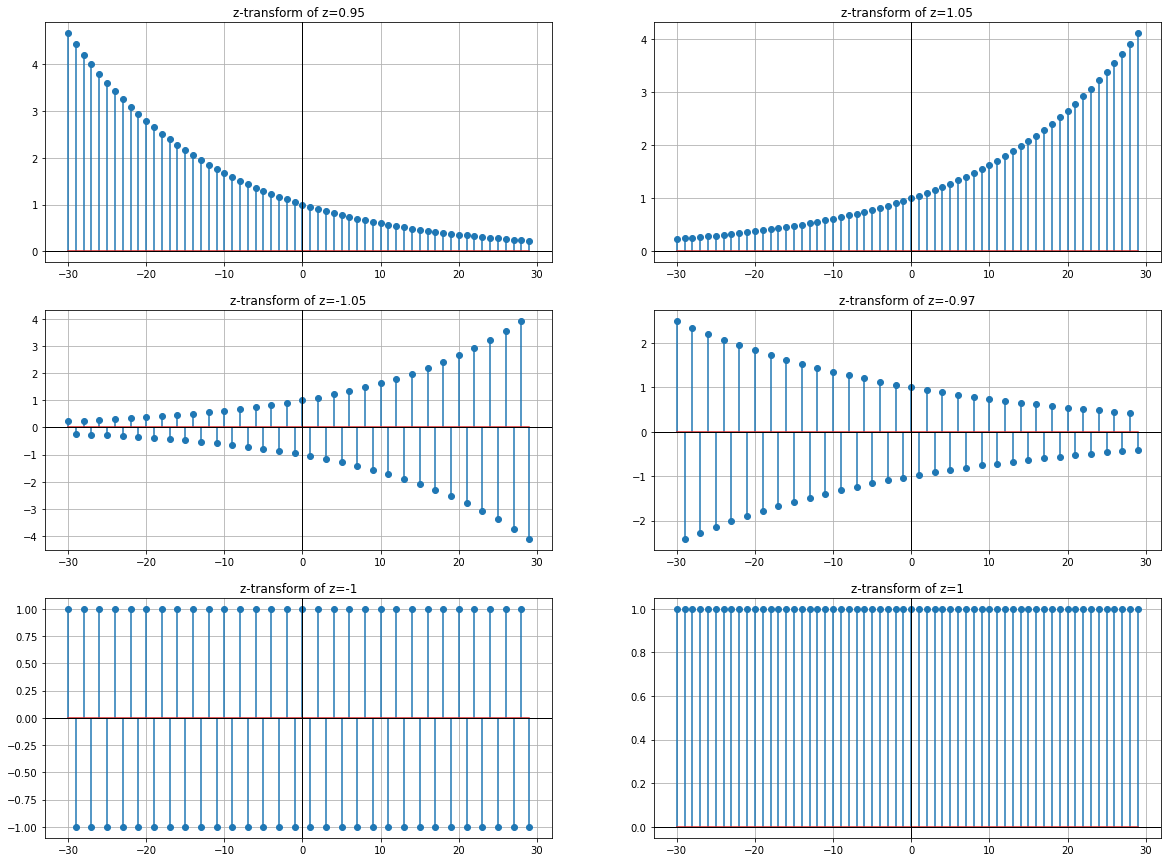

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

def ztransform(data_list,N):
    c=1
    fig, axs = plt.subplots(2, 3, figsize=(20,15))
    for z in data_list:
        y=[z**n for n in N]
        
        plt.subplot(3,2,c)
        plt.stem(N,y,use_line_collection=True)
        plt.title('z-transform of z='+str(z))
        plt.axhline(0,color='b',lineWidth=1,c='k')
        plt.axvline(0,color='b',lineWidth=1,c='k')
        plt.grid()
        c=c+1
    
    
N=np.arange(-30,30,dtype=float)  
data_list=[0.95,1.05,-1.05,-0.97,-1,1]
b=ztransform(data_list,N)    

Q2 Now consider the same sequence with complex values of z. Consider z =−2 + 3j, z = 2 − 3j, z = e^jπ/10, z = 0.95e^jπ/10
 z = 1.05e^jπ/10. For thesevalues of z create 3D plot with both real and imaginary parts. Try usingdifferent markers 
for real and imaginary parts

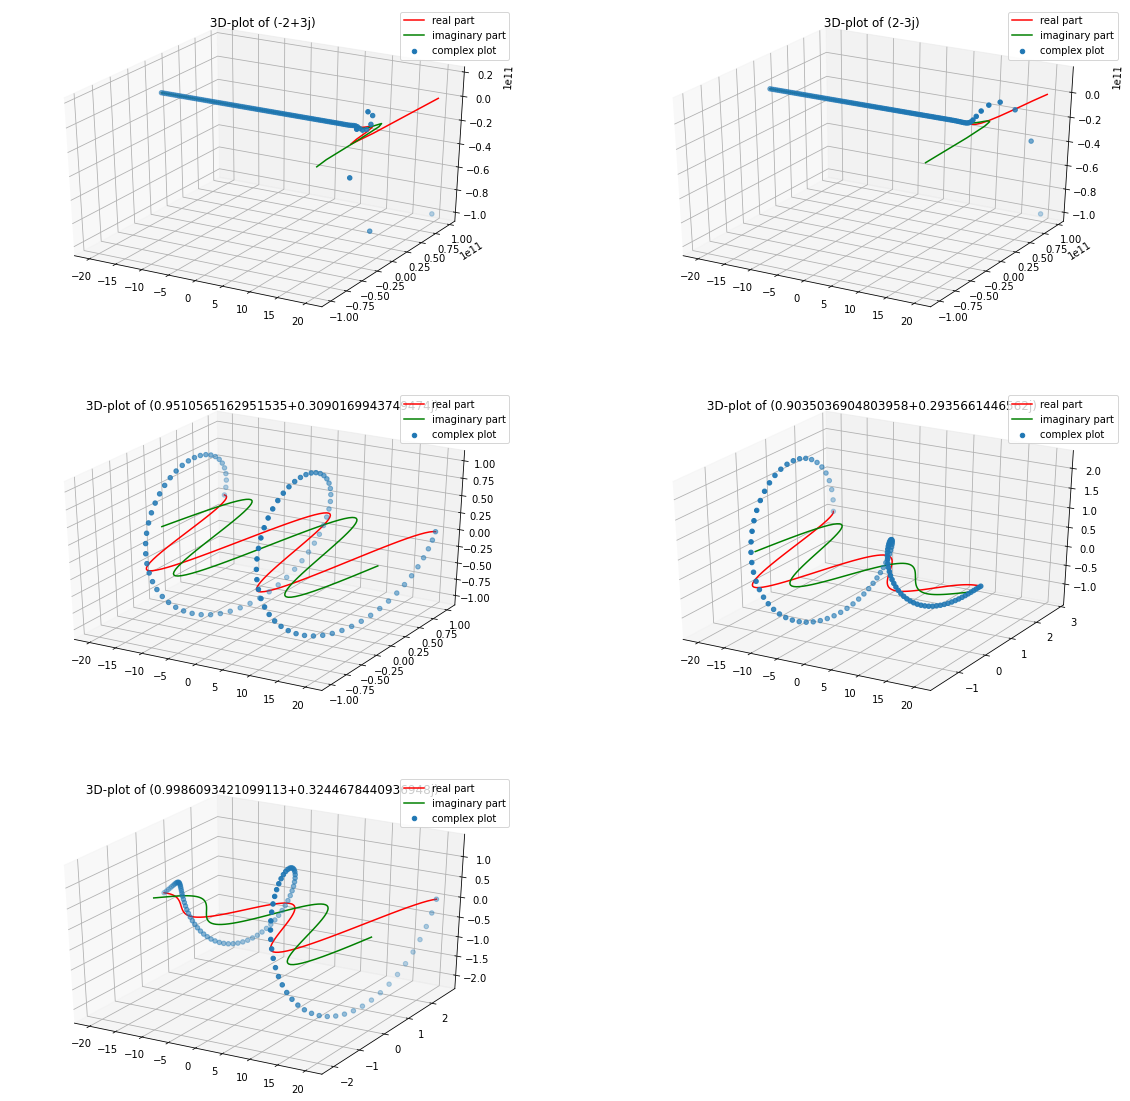

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

def ztrasfor(data_list,n):
    c=1
    fig= plt.figure( figsize=(20,20))
   
    for (data,a) in data_list:
        X=[((a*data)**i).real for i in n]
        Y=[((a*data)**i).imag for i in n]
        
        X=np.asarray(X)
        Y=np.asarray(Y)
       # X,Y=np.meshgrid(X,Y)
        ax = fig.add_subplot(3,2,c,projection='3d') 
        ax.set_title(' 3D-plot of '+str(a*data))
        ax.scatter3D(n, X, Y,label='complex plot')  
        plt.plot(n,X,c='r',label='real part')
        plt.plot(n,Y,c='g',label='imaginary part')
        plt.legend()
        c=c+1
      
        
data_list=[(-2+3j,1),(2-3j,1),(np.exp((1j*np.pi)/10),1),(np.exp((1j*np.pi)/10),0.95),
           (np.exp((1j*np.pi)/10),1.05)]    
n=np.linspace(-20,20,100)
a=ztrasfor(data_list,n)

Q3 The eigen values of the response is the Z Transform of the impulse response. This is also known as the transfer function
denoted by H(z). Compute the magnitude spectrum |H(z)| and the phase spectrum arg[H(z)]
and plot them in separate plots. Plot for the previous section by considering complex z values from last part.

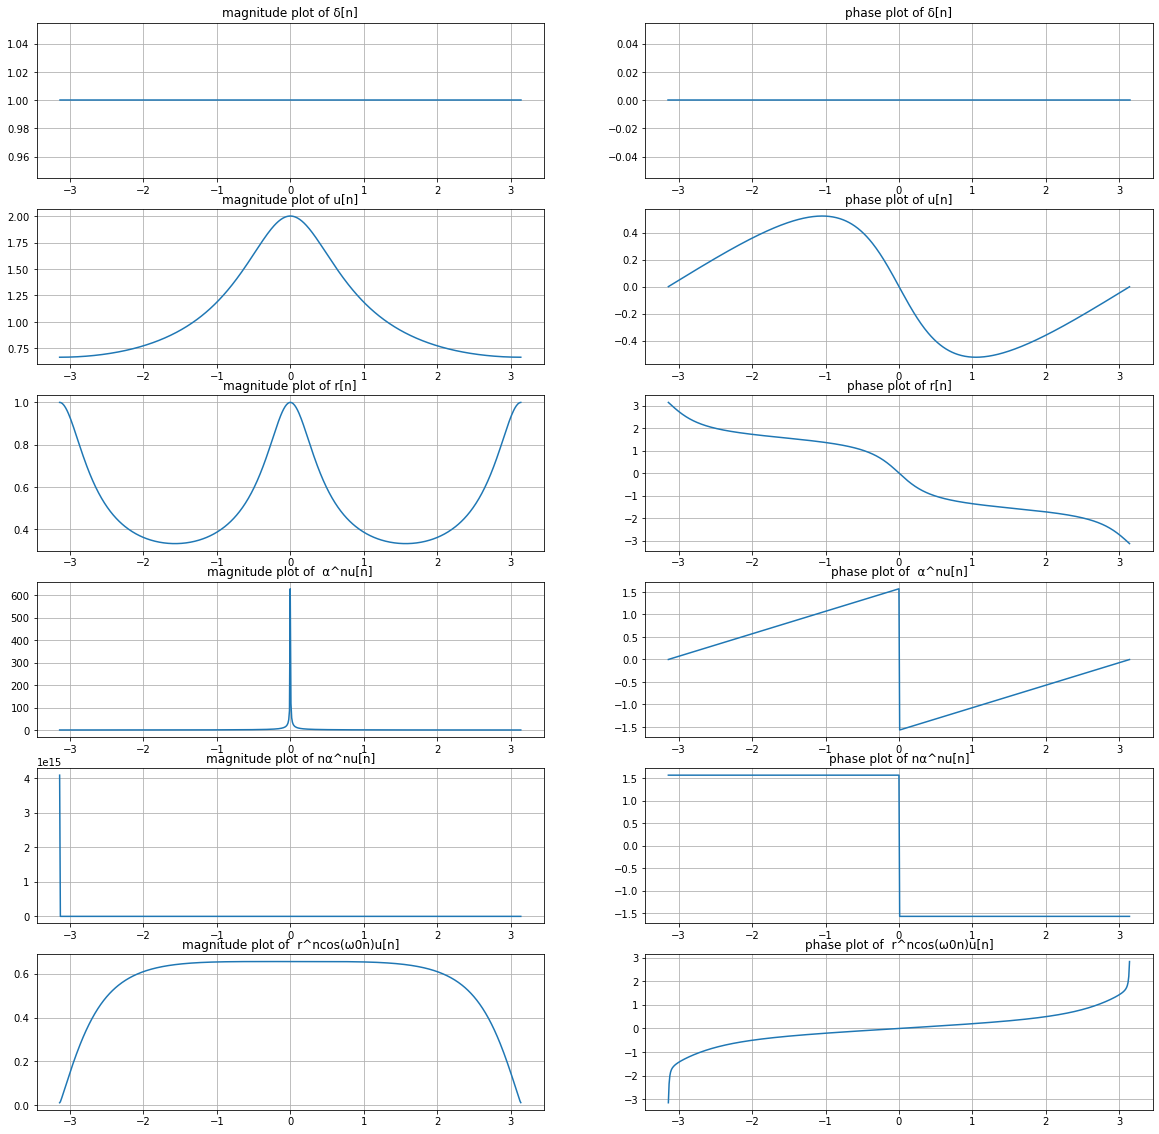

In [9]:
w = np.arange(-np.pi,np.pi,0.01)
x1 = 1
x2 = 1/(1-0.5*np.exp(w*-1j))
x3 = (0.5*np.exp(w*-1j))/(1-0.5*np.exp(w*-1j)**2)   # we take a=2 & and wo=2
x4 = 1/(1-(2*0.5*np.exp(w*-1j)))
x5 = (2*0.5*np.exp(w*-1j))/(1-2*0.5*np.exp(w*-1j)**2)
x6 =  (1 - 2*0.5*np.exp(w*-1j)*np.cos(3))/(1 - 2*2*(0.5*np.exp(w*-1j))*np.cos(3) + (3**(-2))*(0.5*np.exp(w*-1j)**2))

#for delta function magnitude=1 and phase=0

c=1
fig, axs = plt.subplots(6,2,figsize=(20,20))
delta_mag=[1 for i in w]
delta_phase=[0 for i in w]
plt.subplot(6,2,c)
plt.plot(w,delta_mag)
plt.title('magnitude plot of δ[n]')
plt.grid()
c=c+1
plt.subplot(6,2,c)
c=c+1
plt.plot(w,delta_phase)
plt.title('phase plot of δ[n]')
plt.grid()
lst = [x2,x3,x4,x5,x6]
name=['u[n]', 'r[n]',' α^nu[n]','nα^nu[n]', ' r^ncos(ω0n)u[n]']

for j in range(5):
    x = lst[j]
    mag = []
    phase = []
    
    for i in range(len(w)):
        r,angle = cmath.polar(x[i])
        mag.append(r)
        phase.append(angle)
    
    plt.subplot(6,2,c)
    plt.plot(w,mag)
    plt.title('magnitude plot of '+str(name[j]))
    plt.grid()
    c=c+1
    plt.subplot(6,2,c)
    plt.plot(w,phase)
    plt.title('phase plot of '+str(name[j]))
    plt.grid()
    c=c+1

Q4. Compute the Z Transform for the basic signals: δ[n], u[n], r[n], α^nu[n],nα^nu[n], r^ncos(ω0n)u[n]. Choose specific 
values for each and visualize themagnitude and phase spectrums. Also plot the poles and zeros with the
ROC. For which values if any the Z Transform doesnot exist? Try findingout the Z Transform outside the ROC.


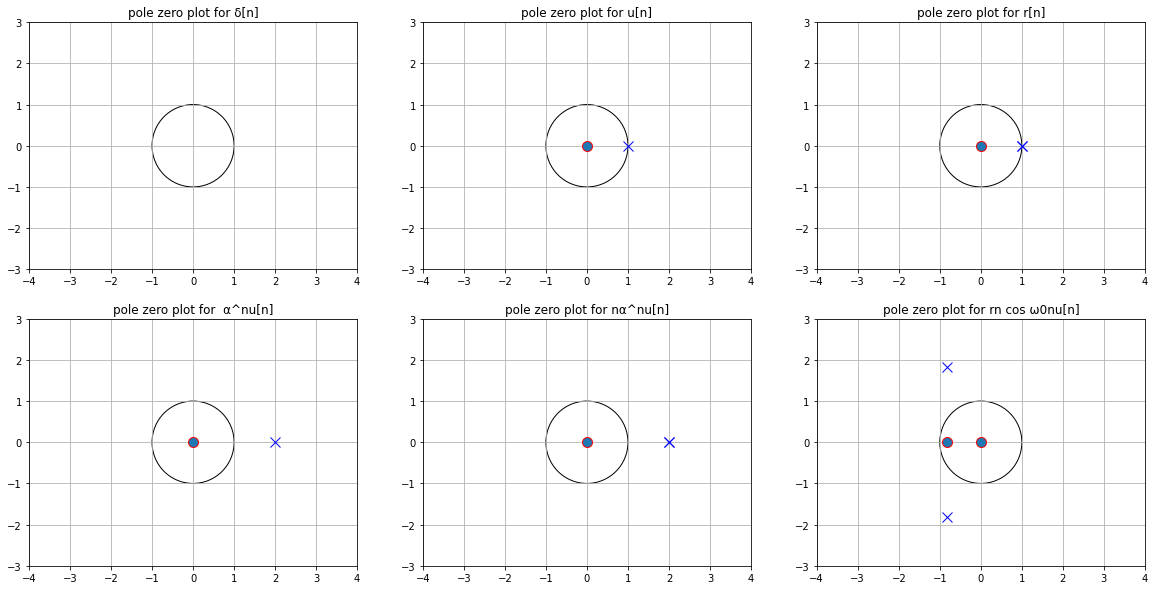

In [12]:
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
import matplotlib.path as mpath 
import matplotlib.pyplot as plt 
# we take a=2 and wo=2
zeros=[[1],[1,0],[1,0],[1,0],[2,0],[1,-2*np.cos(2),0]]
poles=[[1],[1,-1],[1,-2,1],[1,-2],[1,-4,4],[1,-4*np.cos(2),4]]
name=['δ[n]', 'u[n]', 'r[n]',' α^nu[n]','nα^nu[n]', 'rn cos ω0nu[n]']

#find zeros and poles
z=[]
p=[]
fig, axs = plt.subplots(2,3, figsize=(20,10))
for i in range(len(zeros)):
    z.append(np.roots(zeros[i]))
    p.append(np.roots(poles[i]))  
c=1    
for j in range(len(zeros)):
    plt.subplot(2,3,c)
    unit_circle = plt.Circle((0,0),1, fill=False,color='black', ls='solid')
    ax=fig.gca()
    ax.add_patch(unit_circle)
    plt.plot(p[j].real, p[j].imag, 'x', markersize=10, alpha=1,color="blue")
    plt.plot(z[j].real, z[j].imag,  'o', markersize=10, alpha=1,markeredgecolor='r',color=None)
    c=c+1
    plt.grid()
    plt.ylim(-3,3)
    plt.xlim(-4,4)
    plt.title('pole zero plot for '+str(name[j]))
            

# Discrete Time Fourier Series

Q1 The DTFS coefficients of a periodic discrete time signal with period N = 5are given below:
a0 = 1, a2 = a2∗−2 = e^jπ/4, a4 = a∗−4 = 2e^jπ/3 Using the properties of DTFS, determine the values of a0 through a4.
Using these coefficients, determine one period of the signal and display a labelled plot.

[(2.71-1.02j), (-1.33-1.64j), (0.06+0.36j), (0.76+2.88j), (2.8-0.57j)]


C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'samples')

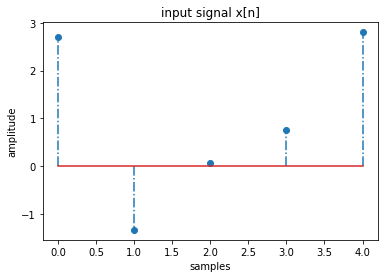

In [11]:
def input_sgnal(N,y):
    a=[]
    for n in range(N):
        total=0
        for i in range(N):
            total=total+y[i]*np.exp((1j*n*2*np.pi*i)/N)
        a.append(round((total),2))
        
    return a 
N=5
n=np.arange(0,5)
#cofficent=[1,2*np.exp(-1j*np.pi/3),np.exp(1j*np.pi/4),np.exp(-1j*np.pi/4),2*np.exp(-1j*np.pi/3)]
cofficent=[1,0,np.exp(1j*np.pi/4),0,2*np.exp(-1j*np.pi/3)]
signal=input_sgnal(N,cofficent)
print(signal)
plt.stem(signal,use_line_collection=True,linefmt='-.')
plt.title('input signal x[n]')
plt.ylabel('amplitude')
plt.xlabel('samples')

Q2 Consider a periodic square wave with fundamental period N = 16 havingmagnitude 1 between n = 0 and n = 7 and zero elsewhere. 
Make a plotof this signal over two periods in blue colour.

Text(0.5, 0, 'samples')

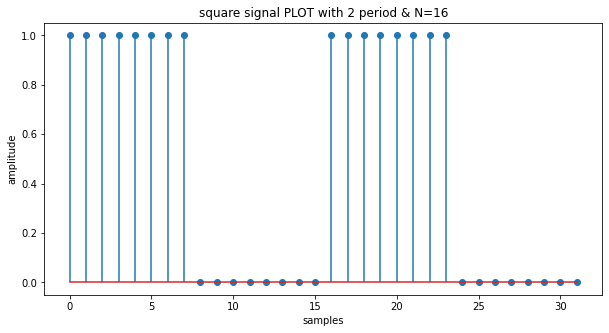

In [94]:
import numpy as np
import matplotlib.pyplot as plt
def square(n):
    y=[]
    for i in n:
        if i>=0 and i<=7:
            y.append(1)
        elif i>=16 and i<=23:
            y.append(1)
        else:
            y.append(0)
            
            
    return y  
n=np.arange(0,32,1)
x=square(n)
fig= plt.figure(figsize=(10,5))
plt.stem(n,x,use_line_collection=True)
plt.title('square signal PLOT with 2 period & N=16')
plt.ylabel('amplitude')
plt.xlabel('samples')

Q3 Determine the DTFS coefficients of this signal and generate magnitude plots of the coefficients.


[0.5, 0.32, 0.0, 0.11, 0.0, 0.08, 0.0, 0.06, 0.0, 0.06, 0.0, 0.08, 0.0, 0.11, 0.0, 0.32]


Text(0.5, 0, 'samples')

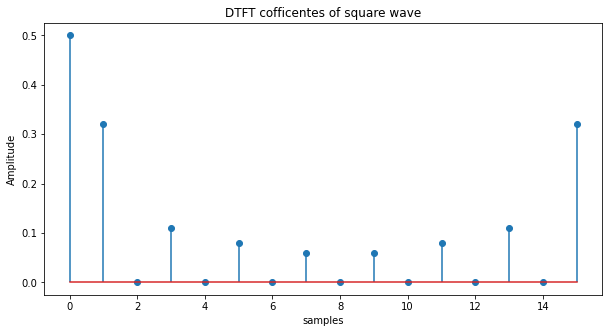

In [96]:
def cofficent(N,x):
    a=[]
    for k in range(16):
        total=0
        for i in n:
            total=total+x[i]*np.exp((-1j*k*2*np.pi*i)/N)
        a.append(round(abs(total/N),2))
        
    return a 
n=np.arange(0,16,1)
out=cofficent(16,x) 
print((out))
X=np.asarray(out)
fig= plt.figure(figsize=(10,5))
plt.stem(n,abs(X),use_line_collection=True)
plt.title('DTFT cofficentes of square wave')
plt.ylabel('Amplitude')
plt.xlabel('samples')

Q4 Using the coefficients determined above, make an approximate reconstruction of the square wave and display it on the plot 
of the original signal in red colour.

[1.64, 1.0, 0.77, 0.64, 0.5, 0.36, 0.23, 0.0, 0.64, 0.0, 0.23, 0.36, 0.5, 0.64, 0.77, 1.0, 1.64, 1.0, 0.77, 0.64, 0.5, 0.36, 0.23, 0.0, 0.64, 0.0, 0.23, 0.36, 0.5, 0.64, 0.77, 1.0]


Text(0.5, 0, 'samples')

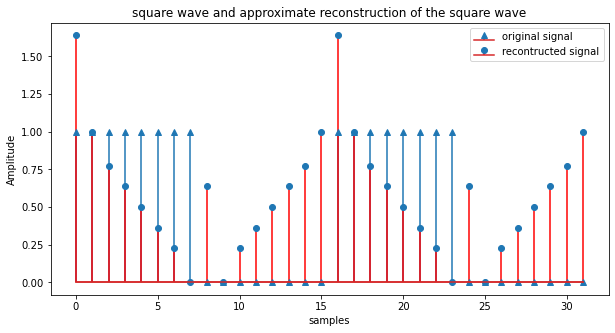

In [98]:
def input_sgnal(N,y):
    a=[]
    for n in range(32):
        total=0
        for i in range(N):
            total=total+y[i]*np.exp((1j*n*2*np.pi*i)/N)
        a.append(round(abs(total),2))
        
    return a 
n=np.arange(0,32,1)
signal=input_sgnal(16,X)
print(signal)
fig= plt.figure(figsize=(10,5))
plt.stem(x,use_line_collection=True, markerfmt='^',label='original signal')
plt.stem(n,signal,'r',use_line_collection=True,label='recontructed signal')
plt.legend()
plt.title('square wave and approximate reconstruction of the square wave')
plt.ylabel('Amplitude')
plt.xlabel('samples')

# Continuous Time Fourier Transform

Q1 Consider a rectangular signalwith amplitude 5 and existing between t = −1 and t = 1. Compute the continuous time Fourier transform of this signal and display a nicely labelled plot.

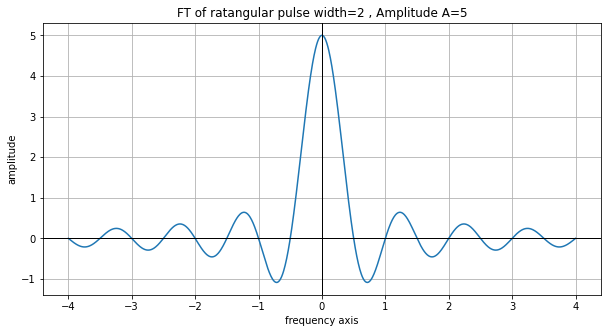

In [15]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,1, figsize=(10,5))
def ft_ratangle(A,f):
    y=A*np.sin(2*np.pi*f)/(2*np.pi*f)
    plt.plot(f,y)
    plt.axhline(0,color='b',lineWidth=1,c='k')
    plt.axvline(0,color='b',lineWidth=1,c='k')
    plt.title('FT of ratangular pulse width=2 , Amplitude A=5')
    plt.xlabel('frequency axis')
    plt.ylabel('amplitude')
    plt.grid()
    
    
A=5    
f=np.linspace(-4,4,1000)
out=ft_ratangle(A,f)

Q2 A message signal m(t) is used to modulate a carrier signal c(t) = cos2πfct and the resultant signal is given by y(t) = m(t)c(t). Plot y(t).  m(t) is a triangular signal existing between t = −1 and t = 1 with a peak amplitude of 1.

Text(0.5, 0, 'time')

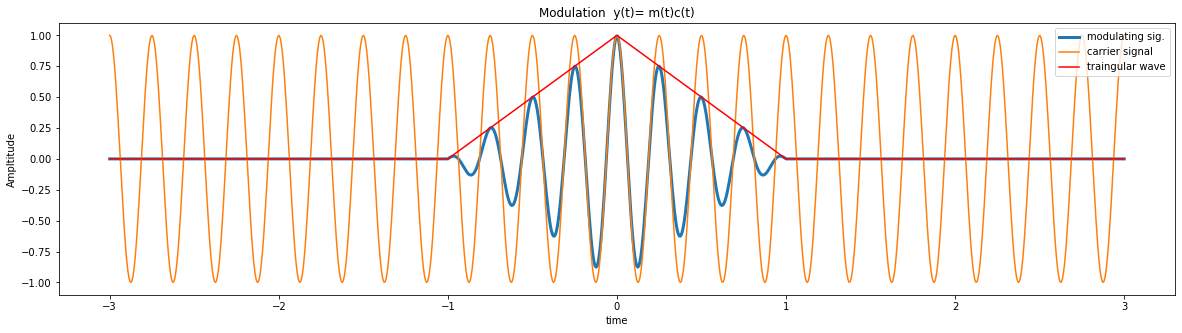

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def triangular(t):
    if t>=-1and t<=0:
        return (t+1)
    elif t>=0 and t<=1:
        return (-t+1)
    else:
        return 0
    
def modulate(f,time):
    y=[]
    m=[]
    c=[]
    for  t in time:
        c_t=np.cos(2*np.pi*fo*t)
        c.append(c_t)
        m_t=triangular(t)
        m.append(m_t)
        y.append(c_t*m_t)
    
    return y,c,m
time=np.linspace(-3,3,1000)
fo=4000
out=modulate(fo,time) 
fig= plt.figure(figsize=(20,5))
plt.plot(time,out[0],lineWidth=3,label='modulating sig.')
plt.plot(time,out[1],label='carrier signal')
plt.plot(time,out[2],c='r',label='traingular wave')
plt.legend()
plt.title("Modulation  y(t)= m(t)c(t)")
plt.ylabel('Ampltitude')
plt.xlabel('time')
#plt.grid()


Q3 Compute the Fourier transform of m(t) and y(t) and display the plots.

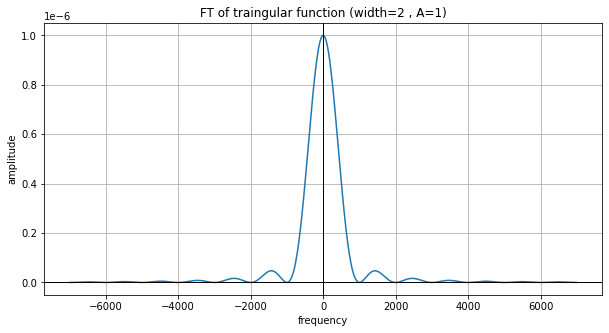

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def ft_traingular(f):
    y=(np.sin(np.pi*f)/(np.pi*f))**2
    fig, axs = plt.subplots(1,1, figsize=(10,5))
    plt.plot(f,y)
    plt.grid(True)
    plt.title('FT of traingular function (width=2 , A=1)')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.axhline(0,color='b',lineWidth=1,c='k')
    plt.axvline(0,color='b',lineWidth=1,c='k')
    
f=np.linspace(-7000,7000,1000)
out=ft_traingular(f)

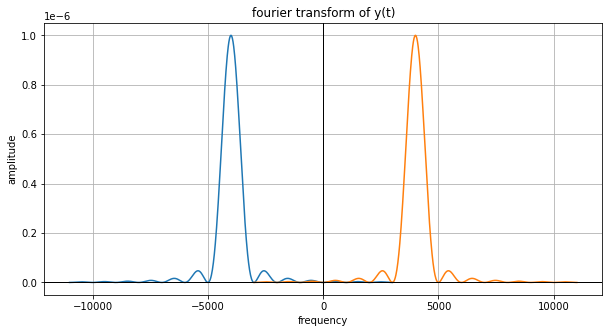

In [19]:
y=(np.sin(np.pi*f)/(np.pi*f))**2
fig, axs = plt.subplots(1,1, figsize=(10,5))
plt.plot(f-fo,y)
plt.plot(f+fo,y)
plt.grid()
plt.title('fourier transform of y(t)')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.axhline(0,color='b',lineWidth=1,c='k')
plt.axvline(0,color='b',lineWidth=1,c='k')